In [1]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import statistics
def quicksort(numbers):
    if len(numbers) <= 1:                                                                                               
       return numbers                                                                                                  
    else:                                                                                                               
       pivot = statistics.median(                                                                                      
          [                                                                                                           
             numbers[0],                                                                                             
             numbers[len(numbers) // 2],
             numbers[-1]
          ]
       )
       items_less, pivot_items, items_greater = (
          [n for n in numbers if n[1] > pivot[1]],
          [n for n in numbers if n[1] == pivot[1]],
          [n for n in numbers if n[1] < pivot[1]]
       )
    
       return (
          quicksort(items_less) +
          pivot_items +
          quicksort(items_greater)
       )

In [3]:
img_path = Path().resolve().parent / 'imgs' / 'crooked.JPG'
img_path.is_file()

True

In [4]:
img = cv2.imread(str(img_path), 0)
h, w = img.shape[:2]
center = (w / 2, h / 2)
center

(1240.0, 1615.5)

9.21310043334961

[[ 9.87099683e-01  1.60106888e-01 -2.42656285e+02]
 [-1.60106888e-01  9.87099683e-01  2.19373003e+02]]


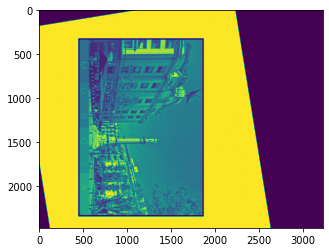

In [5]:
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
areas = []

for i, v in enumerate(contours):
    areas.append((i, cv2.contourArea(v)))
    
areas = quicksort(areas)

# for i in areas[0:2]:
#     idx = i[0]
#     rect = cv2.minAreaRect(contours[idx])
#     box = cv2.boxPoints(rect)
#     box = np.int0(box)
#     cv2.drawContours(img,[box],0,(0,0,255),20)

img_edges = contours[areas[1][0]]

rect = cv2.minAreaRect(img_edges)
angle = rect[-1]
print(angle)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img,[box],0,(0,0,255),15);

M = cv2.getRotationMatrix2D(center, angle-360, 1.0)
print(f'\n{M}')

deskewed = cv2.warpAffine(img, M, (h, w))

plt.imshow(deskewed)

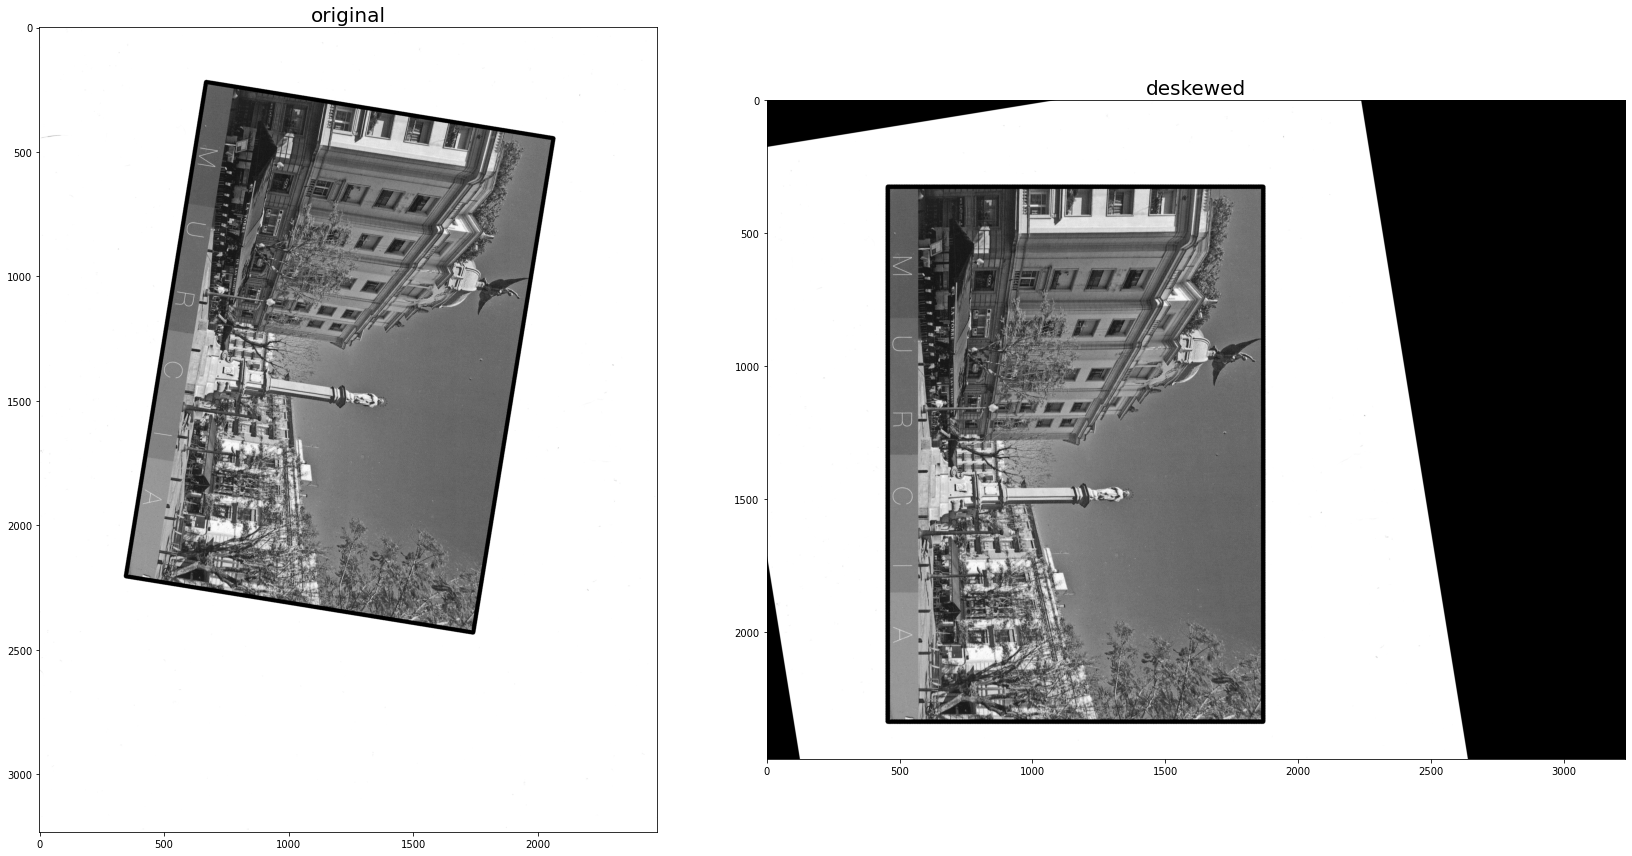

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(deskewed, cmap='gray')
ax[1].set_title('deskewed', fontsize=20)

fig.tight_layout()

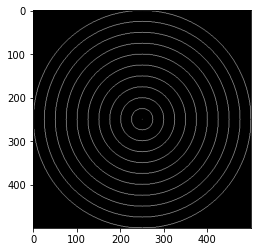

In [7]:
# re-initialize the canvas as an empty array
canvas = np.zeros((500, 500, 3), dtype='uint8')

# compute the center (x, y)-coordinates of the canvas
(centerY, centerX) = (canvas.shape[0] // 2, canvas.shape[1] // 2)
white = (255, 255, 255)

# loop over increasing radii, from 25 pixels to 275 pixels
# in 25 pixel increments

for radius in range(0, 275, 25):
    # draw a white circle with the current radius size
    cv2.circle(canvas, (centerX, centerY), radius, white)

plt.imshow(canvas)